In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#for plotting in Jupyter notebooks

Text(0, 0.5, 'Y dataset')

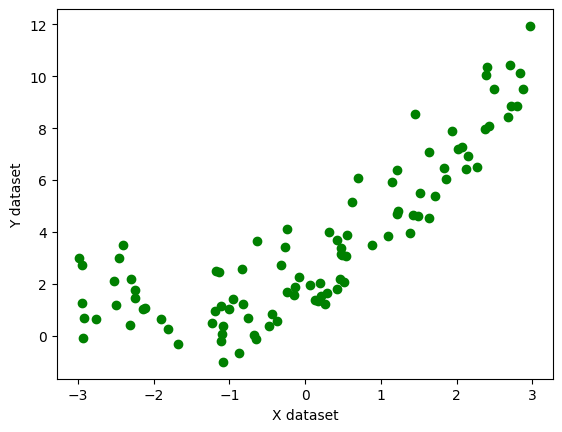

In [3]:
# creating our polynomial dataset
X = 6 * np.random.rand(100,1) - 3   # basically we are creating a dataset of shape (100,1) & -3 is to add some outliers
Y = 0.5* X**2 + 1.5*X + 2 + np.random.randn(100,1)
# quadratic equation used - Y = 0.5X^2 + 1.5X + 2 + outliers
plt.scatter(X,Y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [4]:
 # doing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
# Lets implement first using linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()


In [6]:
regression_1.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
from sklearn.metrics import r2_score

In [8]:
score = r2_score(Y_test,regression_1.predict(X_test))
print(score)

0.7070388176383158


Text(0, 0.5, 'Y dataset')

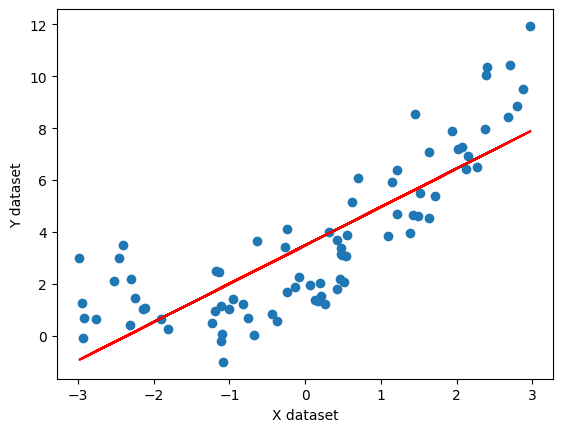

In [9]:
# visualizing the model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,Y_train)
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [10]:
# applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree=2,include_bias=True) # the 1 with B0 will also be included and a polynomial of degree 2 is used
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

In [13]:
X_train_poly   # basically a 2D array with polynomial features i.e bias=1 x1 x1^2

array([[ 1.00000000e+00, -1.00273343e+00,  1.00547433e+00],
       [ 1.00000000e+00, -1.29750293e-01,  1.68351386e-02],
       [ 1.00000000e+00, -2.95041968e+00,  8.70497626e+00],
       [ 1.00000000e+00, -1.19583371e+00,  1.43001825e+00],
       [ 1.00000000e+00, -2.30458956e+00,  5.31113302e+00],
       [ 1.00000000e+00, -1.23255021e+00,  1.51918001e+00],
       [ 1.00000000e+00,  2.14544929e+00,  4.60295264e+00],
       [ 1.00000000e+00, -2.14135795e+00,  4.58541388e+00],
       [ 1.00000000e+00, -2.44726109e-01,  5.98908686e-02],
       [ 1.00000000e+00, -6.70757155e-01,  4.49915161e-01],
       [ 1.00000000e+00,  5.42923059e-01,  2.94765448e-01],
       [ 1.00000000e+00, -6.31022842e-01,  3.98189827e-01],
       [ 1.00000000e+00, -2.76011973e+00,  7.61826092e+00],
       [ 1.00000000e+00, -9.46440161e-01,  8.95748978e-01],
       [ 1.00000000e+00,  1.14057307e+00,  1.30090693e+00],
       [ 1.00000000e+00, -2.11134188e+00,  4.45776452e+00],
       [ 1.00000000e+00,  2.79370942e+00

In [15]:
X_test_poly

array([[ 1.        , -2.94789593,  8.69009041],
       [ 1.        , -0.14352768,  0.0206002 ],
       [ 1.        ,  2.83561535,  8.04071441],
       [ 1.        ,  0.87759891,  0.77017985],
       [ 1.        , -2.50235691,  6.2617901 ],
       [ 1.        , -0.83146646,  0.69133647],
       [ 1.        ,  0.28905769,  0.08355435],
       [ 1.        ,  1.86546712,  3.47996759],
       [ 1.        , -0.31402658,  0.09861269],
       [ 1.        , -1.67755446,  2.81418897],
       [ 1.        , -2.24551072,  5.04231838],
       [ 1.        ,  2.4274505 ,  5.89251594],
       [ 1.        , -0.87687818,  0.76891535],
       [ 1.        ,  1.23291558,  1.52008084],
       [ 1.        , -1.0785904 ,  1.16335725],
       [ 1.        , -0.64526265,  0.41636389],
       [ 1.        , -0.48205217,  0.23237429],
       [ 1.        ,  2.49311492,  6.21562201],
       [ 1.        ,  1.83262272,  3.35850602],
       [ 1.        ,  2.71313945,  7.36112569]])

In [16]:
# performance metrics
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,Y_train)
Y_pred = regression.predict(X_test_poly)
score = r2_score(Y_test,Y_pred)
print(score)

0.9240769142021072


In [17]:
print(regression.coef_)

[[0.         1.51999272 0.45307419]]


In [18]:
print(regression.intercept_)

[2.25255059]


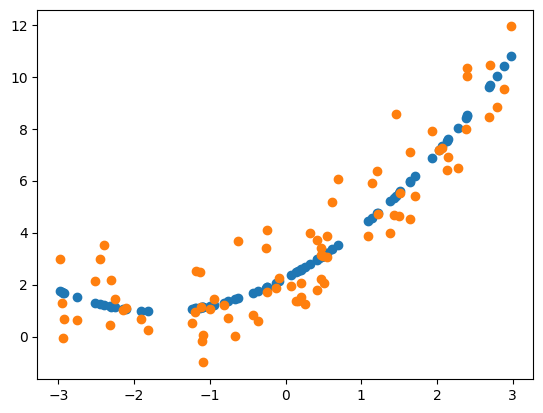

In [20]:
# visualizing best fit line
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,Y_train)

In [21]:
# checking for degree 3
poly_3 = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly_3 = poly_3.fit_transform(X_train)
X_test_poly_3 = poly_3.transform(X_test)

In [22]:
X_train_poly_3

array([[ 1.00000000e+00, -1.00273343e+00,  1.00547433e+00,
        -1.00822272e+00],
       [ 1.00000000e+00, -1.29750293e-01,  1.68351386e-02,
        -2.18436416e-03],
       [ 1.00000000e+00, -2.95041968e+00,  8.70497626e+00,
        -2.56833332e+01],
       [ 1.00000000e+00, -1.19583371e+00,  1.43001825e+00,
        -1.71006402e+00],
       [ 1.00000000e+00, -2.30458956e+00,  5.31113302e+00,
        -1.22399817e+01],
       [ 1.00000000e+00, -1.23255021e+00,  1.51918001e+00,
        -1.87246564e+00],
       [ 1.00000000e+00,  2.14544929e+00,  4.60295264e+00,
         9.87540146e+00],
       [ 1.00000000e+00, -2.14135795e+00,  4.58541388e+00,
        -9.81901247e+00],
       [ 1.00000000e+00, -2.44726109e-01,  5.98908686e-02,
        -1.46568593e-02],
       [ 1.00000000e+00, -6.70757155e-01,  4.49915161e-01,
        -3.01783814e-01],
       [ 1.00000000e+00,  5.42923059e-01,  2.94765448e-01,
         1.60034959e-01],
       [ 1.00000000e+00, -6.31022842e-01,  3.98189827e-01,
      

In [23]:
# checking performance metrics for degree 3
regression = LinearRegression()
regression.fit(X_train_poly_3,Y_train)
Y_pred = regression.predict(X_test_poly_3)
score = r2_score(Y_test,Y_pred)
print(score)

0.9264443052330152


In [24]:
# the score has increased

In [25]:
# prediction of new data set
X_new = np.linspace(-3,3,200).reshape(200,1) # new data points are created
X_new_poly = poly_3.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

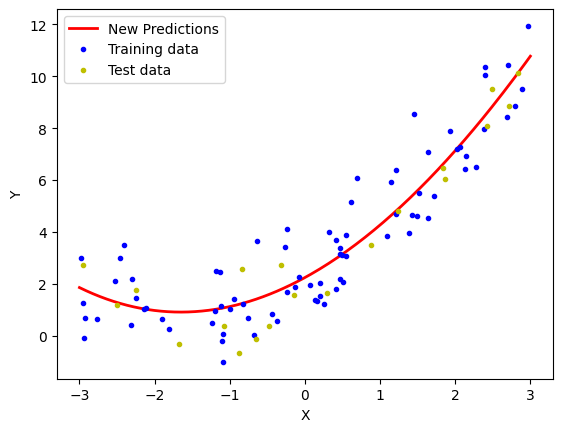

In [33]:
# predict
Y_new = regression.predict(X_new_poly)
plt.plot(X_new,Y_new,"r-",linewidth=2,label="New Predictions")
plt.plot(X_train,Y_train,"b.",label="Training data")
plt.plot(X_test,Y_test,"y.",label="Test data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Pipeline concepts

#### creating a generic function to creation best fit line providing the degrees

In [34]:
from sklearn.pipeline import Pipeline

In [47]:
def poly_regression(degree):
    # taking the dataset
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_reg = Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_reg.fit(X_train,Y_train)  # it is basically first doing the polynomial featuring and then fit of linear regression
    Y_pred_new = poly_reg.predict(X_new)

    #plotting prediction line
    plt.plot(X_new,Y_pred_new,"r-",label="Degree " + str(degree),linewidth=3)
    plt.plot(X_train,Y_train,"b.",label="Training data",linewidth =3)
    plt.plot(X_test,Y_test,"y.",label="Test data",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10]) # the axis function is used to set the limits for the x and y axes. The parameters are: [xmin, xmax, ymin, ymax]
    plt.show()


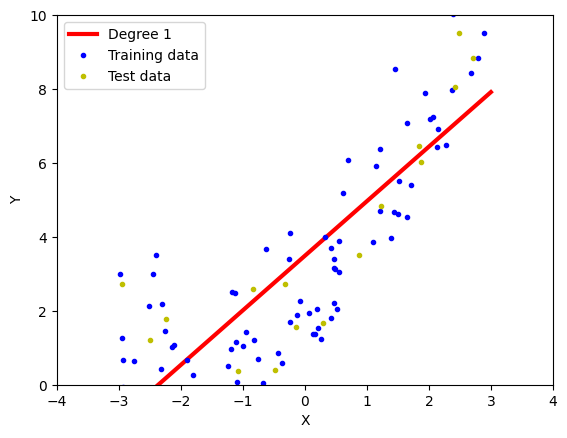

In [40]:
poly_regression(1)

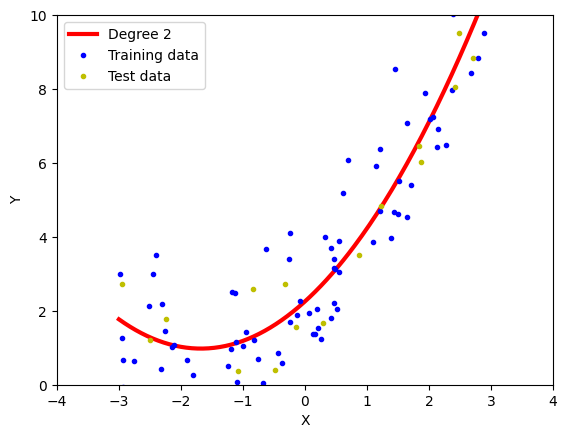

In [41]:
poly_regression(2)

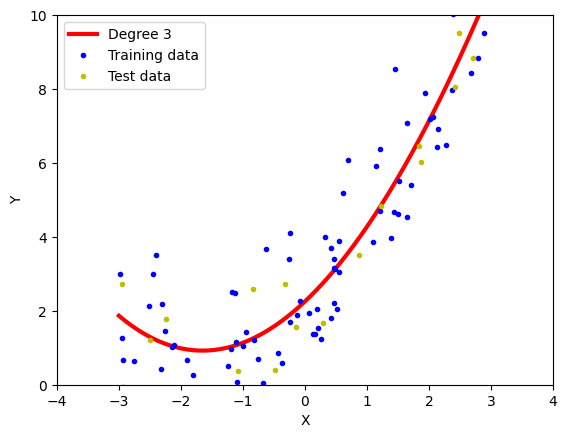

In [42]:
poly_regression(3)

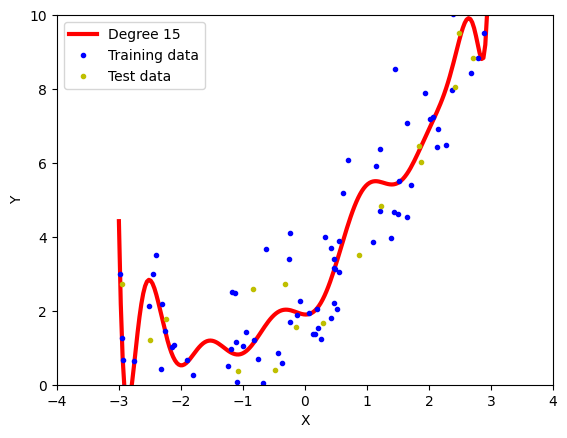

In [44]:
# now as we go on increasing the degree the model overfits, so it is necessary to select the proper degree for best fit line
poly_regression(15) # creates overfitting

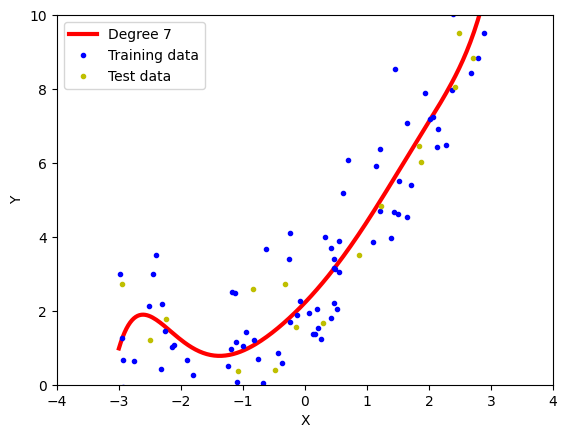

In [45]:
poly_regression(7)

In [46]:
# If asked which degree is better between 7 and 15 , The answer should be 7 as it is less overfitted